# Проект: Исследовательский анализ данных

**Контекст:** Архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Задачи:** Определим рыночную стоимость объектов недвижимости. Для этого проведем исследовательский анализ данных и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

**Описание данных:**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
- balcony — число балконов;
- ceiling_height — высота потолков (м);
- cityCenters_nearest — расстояние до центра города (м);
- days_exposition — сколько дней было размещено объявление (от публикации до снятия);
- first_day_exposition — дата публикации;
- floor — этаж;
- floors_total — всего этажей в доме;
- is_apartment — апартаменты (булев тип);
- kitchen_area — площадь кухни в квадратных метрах (м²);
- last_price — цена на момент снятия с публикации;
- living_area — жилая площадь в квадратных метрах (м²);
- locality_name — название населённого пункта;
- open_plan — свободная планировка (булев тип);
- parks_around3000 — число парков в радиусе 3 км;
- parks_nearest — расстояние до ближайшего парка (м);
- ponds_around3000 — число водоёмов в радиусе 3 км;
- ponds_nearest — расстояние до ближайшего водоёма (м);
- rooms — число комнат;
- studio — квартира-студия (булев тип);
- total_area — общая площадь квартиры в квадратных метрах (м²);
- total_images — число фотографий квартиры в объявлении;

**Содержание:**
1. [Загрузка данных и изучение общей информации](#chapter1)
2. [Предобработка данных](#chapter2)
3. [Добавим в таблицу новые столбцы](#chapter3)
4. [Проведем исследовательский анализ данных](#chapter4)
5. [Общий вывод](#chapter5)

<a id="chapter1"></a> 
###  Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**1.1 Посмотрим основную информацию о датафрейме**

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**1.2 Посмотрим первые 10 строк**

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**1.3 Построим гистограммы для всех числовых столбцов таблицы**

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

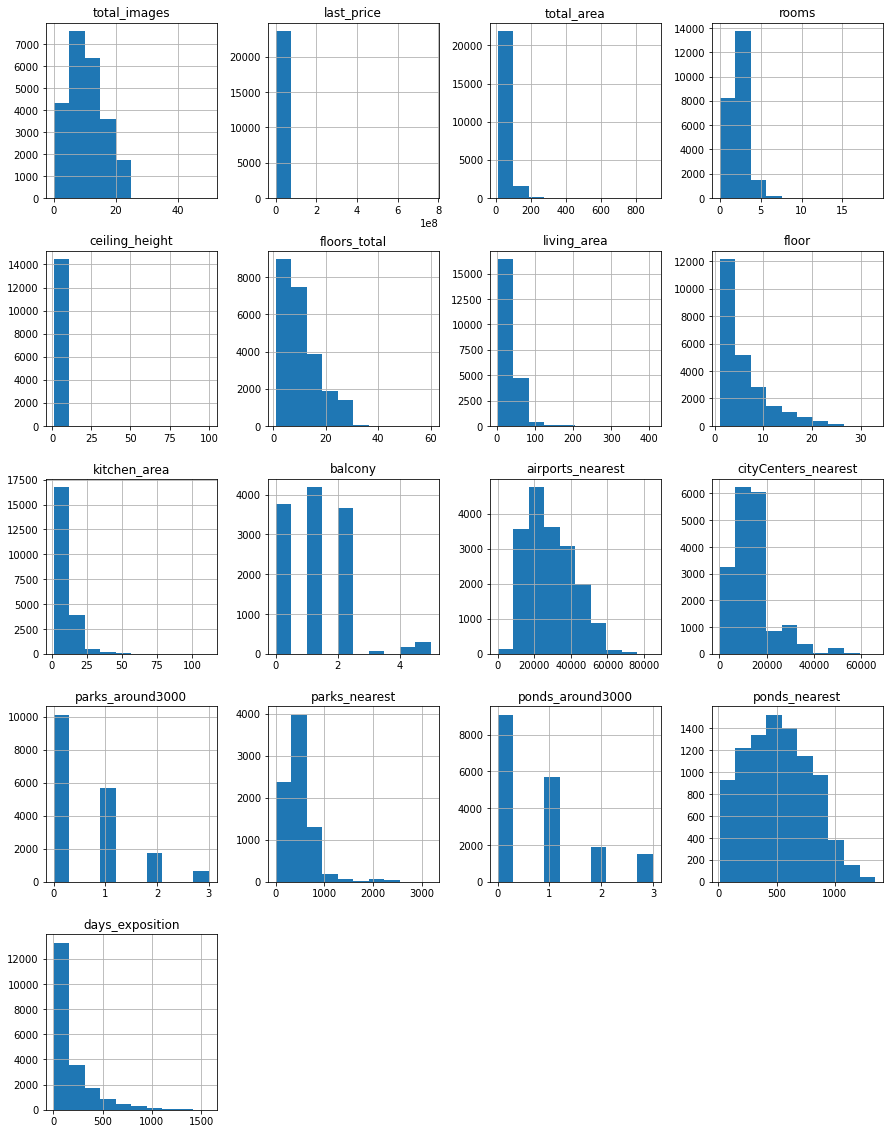

In [4]:
data.hist(figsize=(15, 20))

**1.4 Проверим явные дубликаты**

In [5]:
data.duplicated().sum()

0

**Вывод**

В данных имеются пропуски, а также некорректные типы данных. 
По гистограммам видно, что в данных есть аномальные значение.
Явных дубликатов нет.

<a id="chapter2"></a> 
###  Предобработка данных

**2.1 Переименнуем название столбца cityCenters_nearest**

In [6]:
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'})

**2.2 Изменим тип столбца first_day_exposition на удобный тип для даты**

In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') #изменяем тип для корректной работы кода

**2.3 Проверим в каких столбцах есть пропуски**

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**2.4 Заменим пропуски на медианное значение в столбце ceiling_height**

In [9]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

**2.5 Заполним пропуски в is_apartment**

Заполняем пропуски и изменяем тип данных на булевое значение

In [10]:
data['is_apartment'].value_counts() 

False    2725
True       50
Name: is_apartment, dtype: int64

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'] = data['is_apartment'].astype(bool) #булевое значение меняет соотношение аппартаментов и обычных квартир

In [12]:
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [13]:
data['is_apartment'].mean()

0.0021097936621798387

**2.6 Уберем пропуски в столбце balcony**

In [18]:
data['balcony'] = data['balcony'].fillna(0) #скорее всего балконов просто нет

**2.7 Устраним неявные дубликаты в locality_name**

In [19]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [20]:
len(data['locality_name'].sort_values().unique())

365

Всего уникальнх строк 365, и видны явные дубликаты, удалим их 

In [21]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок', 'поселок городского типа',], 'поселок', regex=True)
) 

In [22]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [23]:
len(data['locality_name'].sort_values().unique())

323

В данном столбце всего 49 пропусков, считаю что их можно удалить

**2.8 Удалим пропуски в locality_name**

In [24]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

**2.9 Проверим еще раз пропуски в таблице**

In [25]:
data.isna().sum() 
#пропуски в floors_total и living_area решила оставить, на мой взгляд заполнять медианными значениями не очень хорошая идея

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

**Выводы**

В данном разделе была выполнена предобработка данных, заполнены пропуски, а некоторые удалены, также были изменены некоторые типы данных 

Причины пропусков:

- Человеческий фактор
- Некоторые поля в анкете не были обязательными
- В полученных данных на основе картографии не были учтены, что в ближайшей местности возможно слишком далеко расположен аэропорт или парк
- Проблемы могли возникнуть на этапе загрузки и на этапе выгрузки данных
- Неправильный запрос, объединение таблиц также может быть причиной



<a id="chapter3"></a> 

### Добавим в таблицу новые столбцы

**3.1 Посчитаем и добавим столбец стоимость квадратного метра**

In [26]:
data['square_meter'] = (data['last_price'] / data['total_area']).round(2) #считаем стоимость квадратного метра

**3.2 Добавим столбец для определения дня недели**

In [27]:
data['weekday'] = data['first_day_exposition'].dt.weekday 

**3.2 Добавм столбец для определения месяца публикации**

In [28]:
data['month'] = data['first_day_exposition'].dt.month 

**3.3 Добавим столбец для определения года публикации**

In [29]:
data['year'] = data['first_day_exposition'].dt.year  

**3.4 Добавим тип этажа квартиры**

In [30]:
def floors(row):                      #определили функцию для категоризации floors (тип этажа квартиры)
    floor_one = row['floor']
    floor_last = row['floors_total']
    
    if floor_one == 1:
        return 'первый'
    
    if floor_one == floor_last:
        return 'последний'
    
    return 'другой'
    
data['type_floor'] = data.apply(floors, axis=1) #добавляем котегоризацию в таблицу

**3.5 Добавим столбец с растоянием до центра города в километрах**

In [31]:
data['distance_city_center'] = (data['city_centers_nearest'] / 1000).round(0) #переведем расстояние из центра города в км

**3.6 Проверяем добавленные столбцы**

In [32]:
data.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter,weekday,month,year,type_floor,distance_city_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


**Выводы**

В данном разделе были добавлены новые столбцы для проведения исследовательского анализа данных

<a id="chapter4"></a> 

###  Проведем исследовательский анализ данных

**4.1 Изучим некоторые параметры** 

In [33]:
data = data.query('((living_area<100) | (living_area.isna())) & ((city_centers_nearest<55000) | (city_centers_nearest.isna())) & ((floors_total<30) | (floors_total.isna())) & ((parks_nearest < 1500) | (parks_nearest.isna()))')

count    23070.000000
mean        57.680000
std         27.129819
min         12.000000
25%         40.000000
50%         51.300000
75%         68.000000
max        631.000000
Name: total_area, dtype: float64

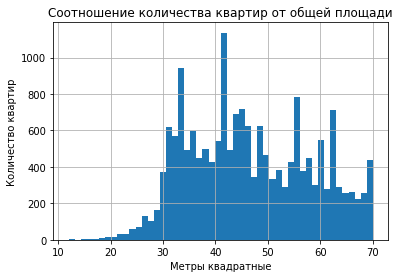

In [34]:
data['total_area'].round(0).hist(bins=50, range=(12,70))
plt.title('Соотношение количества квартир от общей площади')
plt.xlabel('Метры квадратные')
plt.ylabel('Количество квартир')
data['total_area'].describe()

Стандартное отклонение велико, что свидетельствует об анамалиях и выбросах. Также среднее значение больше чем медиана,значит в распределении данных есть длинный хвост. Выберем те значения которые находятся в диапазоне от 12 до 70 метров квадратных. Средняя площадь квартиры составляет 52 квадратных метра

count    21189.000000
mean        32.575471
std         15.739007
min          2.000000
25%         18.500000
50%         30.000000
75%         42.000000
max         99.900000
Name: living_area, dtype: float64

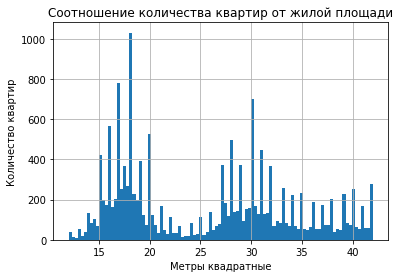

In [35]:
data['living_area'].hist(bins=100, range=(12,42))
plt.title('Соотношение количества квартир от жилой площади')
plt.xlabel('Метры квадратные')
plt.ylabel('Количество квартир')
data['living_area'].describe()

Минимальная жилая площадь составляет 2 метра квадратных, не очень похоже на правду. Возьмем начало диапазона такой же как и в столбце total_area 

count    20839.000000
mean        10.316574
std          5.358809
min          1.300000
25%          7.000000
50%          9.000000
75%         11.705000
max         93.200000
Name: kitchen_area, dtype: float64

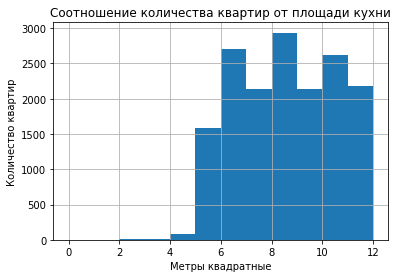

In [36]:
data['kitchen_area'].hist(bins=12, range=(0,12))
plt.title('Соотношение количества квартир от площади кухни')
plt.xlabel('Метры квадратные')
plt.ylabel('Количество квартир')
data['kitchen_area'].describe()

В среднем площадь кухни составляет 9 метров квадратных

count    2.307000e+04
mean     5.950118e+06
std      6.526372e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.599000e+06
max      3.300000e+08
Name: last_price, dtype: float64

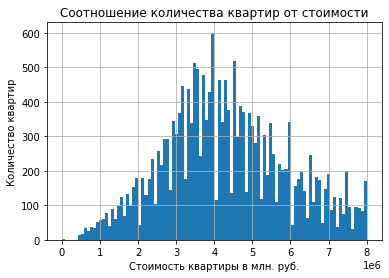

In [37]:
data['last_price'].hist(bins=100, range=(1.219000e+04,8.00000e+06))
plt.title('Соотношение количества квартир от стоимости')
plt.xlabel('Стоимость квартиры в млн. руб.')
plt.ylabel('Количество квартир')
data['last_price'].describe()

Наиболее часто стоимость квартир находится в диапазоне от 3,5 до 4,5 млн. руб.

count    23070.000000
mean         2.016255
std          0.966537
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

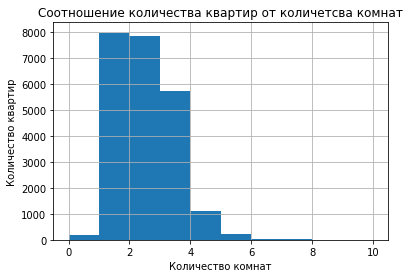

In [38]:
data['rooms'].hist(bins=10, range=(0, 10))
plt.title('Соотношение количества квартир от количетсва комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
data['rooms'].describe()

Больше всего предложений на рынке однокомнатных квартир

count    23070.000000
mean         2.716857
std          0.985174
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

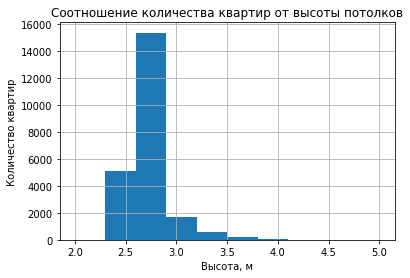

In [39]:
data['ceiling_height'].hist(bins=10, range=(2, 5))
plt.title('Соотношение количества квартир от высоты потолков')
plt.xlabel('Высота, м')
plt.ylabel('Количество квартир')
data['ceiling_height'].describe()

Квартиры с высотой потолков 2.65 м. лидируют на рынке

count      23070
unique         3
top       другой
freq       16985
Name: type_floor, dtype: object

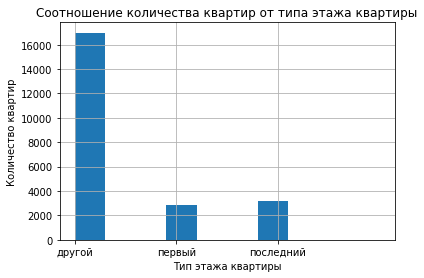

In [40]:
data['type_floor'].hist(bins=10, range=(0, 3))
plt.title('Соотношение количества квартир от типа этажа квартиры')
plt.xlabel('Тип этажа квартиры')
plt.ylabel('Количество квартир')
data['type_floor'].describe()

Больше всего предложений на рынке квартир, находящихся на любых этажах кроме первого и последнего

count    22988.000000
mean        10.717679
std          6.556578
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

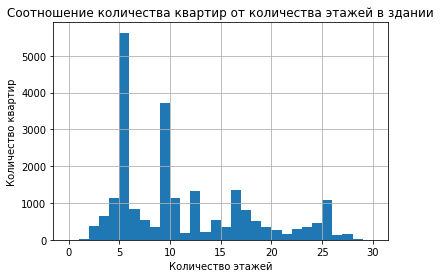

In [41]:
data['floors_total'].hist(bins=30, range=(0, 30)) #максимальное кол-во этажей может быть 30
plt.title('Соотношение количества квартир от количества этажей в здании')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
data['floors_total'].describe()

Большее число квартир продаются в пяти этажных зданиях

count    17567.000000
mean     14333.290943
std       8486.623377
min        208.000000
25%       9570.000000
50%      13222.000000
75%      16333.000000
max      54926.000000
Name: city_centers_nearest, dtype: float64

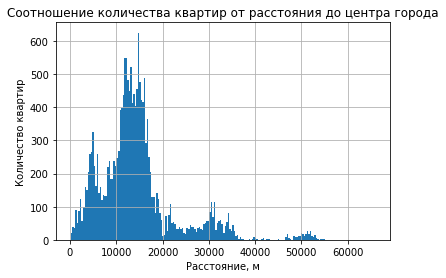

In [42]:
data['city_centers_nearest'].hist(bins=200, range=(181, 65968)) 
plt.title('Соотношение количества квартир от расстояния до центра города')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
data['city_centers_nearest'].describe()

Большее число квартир продаются на расстоянии от 12000 до 18000 метров до центра города, а также на 5000 метров. После 40000 метров начинается спад предложений

count    7638.000000
mean      456.613642
std       242.232003
min         1.000000
25%       284.000000
50%       447.000000
75%       602.000000
max      1499.000000
Name: parks_nearest, dtype: float64

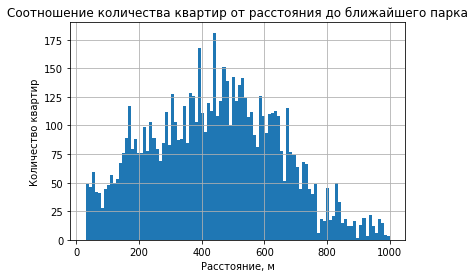

In [43]:
data['parks_nearest'].hist(bins=100, range=(30, 1000)) 
plt.title('Соотношение количества квартир от расстояния до ближайшего парка')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
data['parks_nearest'].describe()

Сильной зависмости от количества предложений от расстояния до ближайшего парка нет. Но можно предположить, что в среднем расстояние до ближайшего парка составляет от 200 до 600 метров.

**4.2 Изучим, как быстро продавались квартиры**

count    20013.000000
mean       178.130965
std        216.906562
min          1.000000
25%         44.000000
50%         94.000000
75%        227.000000
max       1580.000000
Name: days_exposition, dtype: float64

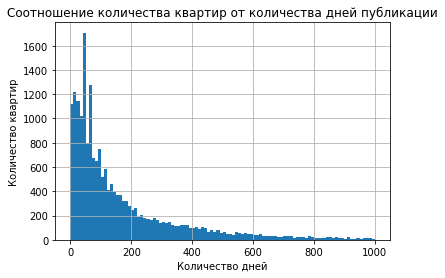

In [44]:
data['days_exposition'].hist(bins=100, range=(0, 1000)) #Отбросим значение больше 1000, так как этих данных не очень много
plt.title('Соотношение количества квартир от количества дней публикации')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
data['days_exposition'].describe()

В среднем продажа квартир составляет 95 дней.
Быстрыми продажами можно считать менее 45 дней, долгими более 231 дня

**4.3 Определим факторы влияющие на стоимость квартиры**

(0.0, 100000000.0)

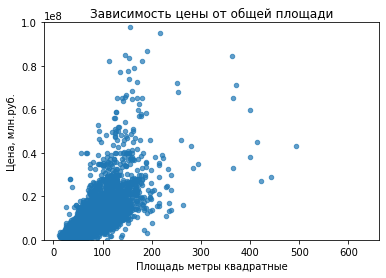

In [45]:
data.plot(x='total_area', y ='last_price', kind ='scatter', alpha = 0.7)

plt.title('Зависимость цены от общей площади')
plt.xlabel('Площадь метры квадратные')
plt.ylabel('Цена, млн.руб.')
plt.ylim(0, 100000000)


Видна явная зависимость цены от общей площади

(0.0, 100000000.0)

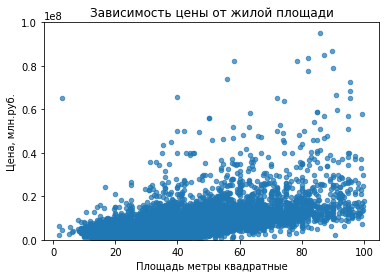

In [46]:
data.plot(x='living_area', y ='last_price', kind ='scatter', alpha = 0.7)

plt.title('Зависимость цены от жилой площади')
plt.xlabel('Площадь метры квадратные')
plt.ylabel('Цена, млн.руб.')
plt.ylim(0, 100000000)

Также видна явная зависимость цены от жилой площади

(0.0, 100000000.0)

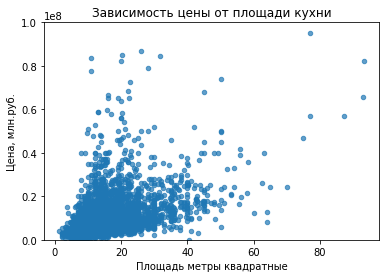

In [47]:
data.plot(x='kitchen_area', y ='last_price', kind ='scatter', alpha = 0.7)

plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь метры квадратные')
plt.ylabel('Цена, млн.руб.')
plt.ylim(0, 100000000)

Также видна зависимость цены от площади кухни

(0.0, 100000000.0)

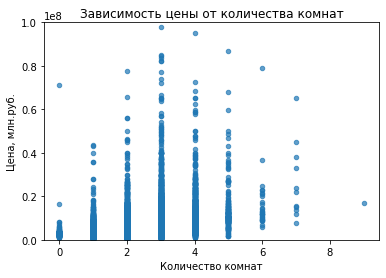

In [48]:
data.plot(x='rooms', y ='last_price', kind ='scatter', alpha = 0.7)

plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена, млн.руб.')
plt.ylim(0, 100000000)

До 3-х комнатных квартир цена растет, а от 3-х и до 5-и комнатных квартир цена примерно одинаковая

(0.0, 100000000.0)

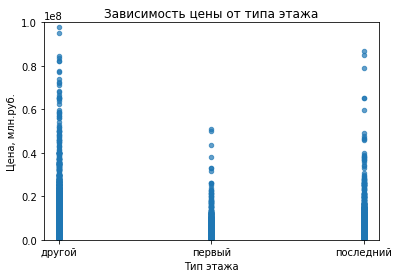

In [49]:
data.plot(x='type_floor', y ='last_price', kind ='scatter', alpha = 0.7)

plt.title('Зависимость цены от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена, млн.руб.')
plt.ylim(0, 100000000)

Квартиры на последних этажах стоят дороже

(0.0, 100000000.0)

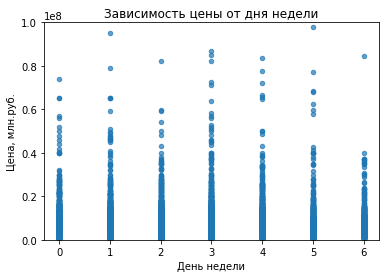

In [50]:
data.plot(x='weekday', y ='last_price', kind ='scatter', alpha = 0.7)

plt.title('Зависимость цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Цена, млн.руб.')
plt.ylim(0, 100000000)

Зависимость стоимости квартир от дня недели отсутствует

(0.0, 100000000.0)

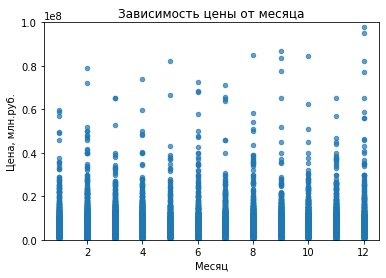

In [51]:
data.plot(x='month', y ='last_price', kind ='scatter', alpha = 0.7)

plt.title('Зависимость цены от месяца')
plt.xlabel('Месяц')
plt.ylabel('Цена, млн.руб.')
plt.ylim(0, 100000000)

Зависимость стоимости квартир от месяца отсутствует

(0.0, 100000000.0)

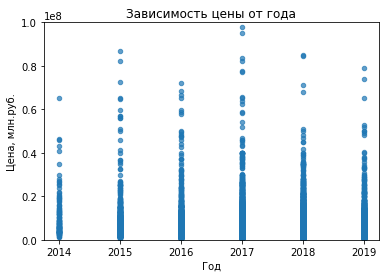

In [52]:
data.plot(x='year', y ='last_price', kind ='scatter', alpha = 0.7)

plt.title('Зависимость цены от года')
plt.xlabel('Год')
plt.ylabel('Цена, млн.руб.')
plt.ylim(0, 100000000)

До 2017 года цена росла, но после 2017 начала снижаться, возможно это связано с тем, что с 2014 года началось снижение ключевой ставки, люди начали брать ипотеки. А с 2017 года спрос скорее всего просто упал 

**4.4 Посчитайтаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [53]:
price_square_meter = data.pivot_table(index='locality_name', values='last_price', aggfunc='count') #считаем кол-во объявлений

price_square_meter.columns = ['count'] #переименовываем столбец(избавимся от мультииндекса)

price_square_meter = price_square_meter.sort_values(by='count', ascending=False).head(10) #сохраняем новую таблицу с сортировкой

price_square_meter['price_square_meter'] = data.pivot_table(index='locality_name', values='square_meter').round(2) #добавляем новый столбец cо средней ценой квадратного метра

price_square_meter.sort_values(by='price_square_meter', ascending=False)#cортируем

price_square_meter

,count,price_square_meter
locality_name,,
Санкт-Петербург,15184,113174.61
поселок Мурино,556,85681.76
поселок Шушары,440,78677.36
Всеволожск,398,68654.47
Пушкин,364,102965.76
Колпино,332,75300.38
поселок Парголово,327,90175.91
Гатчина,306,68797.70
деревня Кудрово,299,92473.55


4.4.1 Выделим населённый пункт с самой высокой стоимостью квадратного метра

In [54]:
price_square_meter[price_square_meter['price_square_meter'] == price_square_meter['price_square_meter'].max()]

,count,price_square_meter
locality_name,,
Санкт-Петербург,15184,113174.61


4.4.2 Выделим населённый пункт с самой низкой стоимостью квадратного метра

In [55]:
price_square_meter[price_square_meter['price_square_meter'] == price_square_meter['price_square_meter'].min()]

,count,price_square_meter
locality_name,,
Выборг,235,57997.55


Наибольшая средняя цена одного квадратного метра с наибольшим числом объявлений является Санкт-Петербург. А населённый пункт с самой низкой стоимостью квадратного метра является деревня Выборг

**4.5 Определим как стоимость объектов зависит от расстояния до центра Санкт-Петербурга**

Text(0, 0.5, 'Цена млн. руб.')

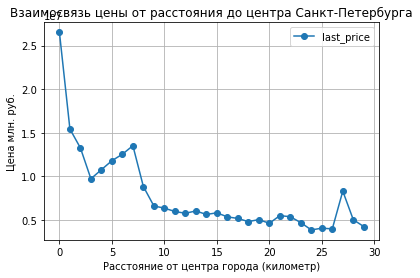

In [56]:
(data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='distance_city_center', values='last_price')
    .plot(grid=True, style='o-')
)
plt.title('Взаимосвязь цены от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние от центра города (километр)')
plt.ylabel('Цена млн. руб.')

In [57]:
(data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='distance_city_center', values='last_price')
)

,last_price
distance_city_center,
0.0,2.652396e+07
1.0,1.542421e+07
2.0,1.325729e+07
3.0,9.720667e+06
4.0,1.076107e+07
5.0,1.178982e+07
6.0,1.253757e+07
7.0,1.351233e+07
8.0,8.828446e+06


На графике очень хорошо видна зависимость цены от расстояния до центра Санкт-Петербурга. Также есть скачек цены в 27 км от центра, возможно это "премиум" район

<a id="chapter5"></a> 

###  Общий вывод

**В данном исследовании объявлений о продаже квартир были выполнены следующие работы**

*Предобработка данных:* 

- изучена общая информация о данных
- удалены и заполнены пропуски
- изменены типы данных
- удалены неявные дубликаты

*Добавлены новые столбцы в таблицу:*

- square_meter - цена квадратного метра объекта с точностью до двух знаков после запятой
- weekday - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
- month - месяц публикации объявления
- year - год публикации объявления
- type_floor - тип этажа квартиры
- distance_city_center - расстояние до центра города в целых километрах

*Исследовательский анализ данных:*

1. Изучены параметры объектов и построены отдельные гистограммы, для определения среднестатистической квартиры:

- общая площадь: 52 квадратных метра 
- жилая площадь: 30 квадратных метров
- площадь кухни: 9 квадратных метров
- цена объекта: от 3,5 до 4,5 млн.руб.
- количество комнат: 1 или 2
- высота потолков:2,65 м.
- тип этажа квартиры: любой этаж кроме последнего и первого
- общее количество этажей в доме: 5
- расстояние до центра города: от 12 до 18 км. либо 5 км.
- расстояние до ближайшего парка: от 200 до 600 м.

2. Рассмотрели в какой срок продавались квартиры

В среднем продажа квартир составляет 95 дней. Быстрыми продажами можно считать менее 45 дней, долгими более 231 дня.

3. Определили факторы влияющие на стоимость объекта, а также построили графики зависимостей

На стоимость квартиры влияют:

- общая площадь: чем больше площадь, тем выше цена квартиры
- жилая площадь: чем больше площадь, тем дороже квартира
- площадь кухни: чем больше кухня, тем выше стоимость квартиры
- количество комнат: чем больше комнат, тем выше цена квартиры
- этаж квартиры: квартиры на последних этажах стоят дороже

4. Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений 

Наибольшая средняя цена одного квадратного метра с наибольшим числом объявлений является Санкт-Петербург. Затем идет поселок Мурино, это видимо связано с тем что район очень хорошо благоустроен, а заними идут все остальные ближлежайшие районы Санкт-Петербурга. А населённый пункт с самой низкой стоимостью квадратного метра является деревня Выборг

5. Определили стоимость квартир на разном удалении от центра Санкт-Петербурга

Наибольшая стоимость квартир составила в близи центра Санкт-Петербурга, по удалению от него стоимость квартир снижается 



